# *Why Regularization Is Important*

In [50]:
import pandas as pd ,numpy as np ,matplotlib.pyplot as plt ,seaborn as sns ,math ,warnings
warnings.filterwarnings('ignore', module='sklearn')

In [2]:
data = pd.read_csv("X_Y_Sinusoid_Data.csv")

In [3]:
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [4]:
x_real = np.linspace(0.0,1.0,100)
y_real = np.sin(2*math.pi*x_real)

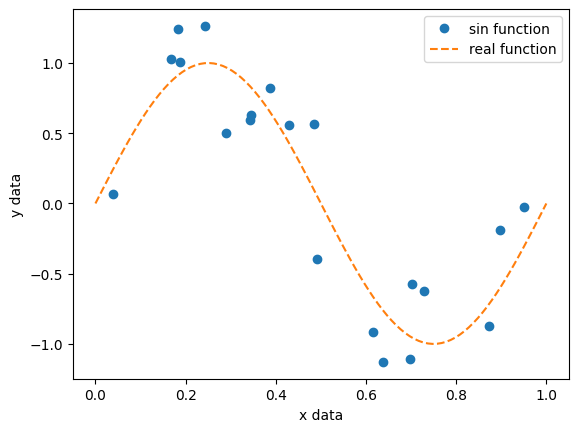

In [51]:
ax = data.set_index(["x"])["y"].plot(linestyle=" ", marker="o", alpha = 1, label = "sin function")
ax.plot(x_real ,y_real ,linestyle="--", alpha = 1, label = "real function")
ax.legend(loc = "best")
ax.set(xlabel='x data', ylabel='y data');

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge

[Text(0.5, 0, 'x_data'), Text(0, 0.5, 'y_label')]

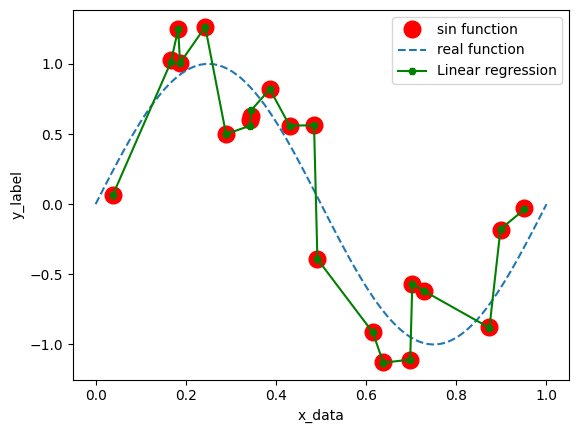

In [54]:
poly = PolynomialFeatures(degree = 20)
lg = LinearRegression()

x_data = data[["x"]]
y_data = data["y"]

x_ploy = poly.fit_transform(x_data)
lg.fit(x_ploy ,y_data)
prediction = lg.predict(x_ploy)

ax = data.set_index(["x"])["y"].plot(linestyle=" " ,marker="o" ,alpha = 1 ,label = "sin function" ,color = "r" ,markersize=12)
ax.plot(x_real ,y_real ,linestyle="--" ,alpha = 1 ,label = "real function" )
ax.plot(data["x"] ,prediction ,marker="H" ,alpha = 1 ,label = "Linear regression" ,color = "g" ,markersize=5)
ax.legend(loc = "best")
ax.set(xlabel = "x_data" ,ylabel = "y_label")

### Model is Overfitted 

[Text(0.5, 0, 'x_data'), Text(0, 0.5, 'y_label')]

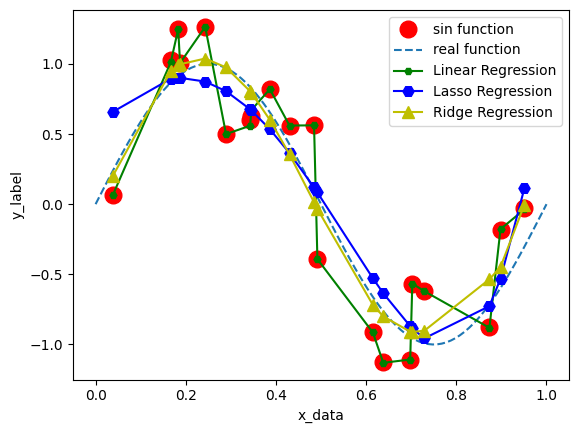

In [61]:
la = Lasso(alpha = 0.001)
la.fit(x_ploy ,y_data)
prediction_lasso = la.predict(x_ploy)

ridge = Ridge(alpha = 0.0001)
ridge.fit(x_ploy ,y_data)
prediction_ridge = ridge.predict(x_ploy)

ax = data.set_index(["x"])["y"].plot(linestyle=" " ,marker="o" ,alpha = 1 ,label = "sin function" ,color = "r" ,markersize=12)
ax.plot(x_real ,y_real ,linestyle="--" ,alpha = 1 ,label = "real function" )
ax.plot(data["x"] ,prediction ,marker="H" ,alpha = 1 ,label = "Linear Regression" ,color = "g" ,markersize=5)
ax.plot(data["x"] ,prediction_lasso ,marker="H" ,alpha = 1 ,label = "Lasso Regression" ,color = "b" ,markersize=8)
ax.plot(data["x"] ,prediction_ridge ,marker="^" ,alpha = 1 ,label = "Ridge Regression" ,color = "y" ,markersize=8)
ax.legend(loc = "best")
ax.set(xlabel = "x_data" ,ylabel = "y_label")

###  By Using Regularization We Can Avoid Overfitting

In [68]:
coefficients = pd.DataFrame()
coefficients['linear regression'] = lg.coef_.ravel()
coefficients['ridge regression'] = la.coef_.ravel()
coefficients['lasso regression'] = ridge.coef_.ravel()
coefficients = coefficients.applymap(abs)

display(coefficients.head())
coefficients.describe()

,linear regression,ridge regression,lasso regression
0,2.083235e+12,0.000000,0.000000
1,1.609937e+07,3.973425,10.580137
2,4.635069e+08,10.423510,23.075093
3,7.641057e+09,0.000000,2.473600
4,8.232355e+10,0.000000,7.534027


,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.748785e+13,1.017710,4.545873
std,6.011993e+13,2.556141,5.094313
min,1.609937e+07,0.000000,0.000000
25%,2.083235e+12,0.000000,2.010479
50%,3.603130e+13,0.000000,3.259910
75%,1.063884e+14,0.000000,4.539545
max,1.643312e+14,10.423510,23.075093
